# REQUIREMENTS

In [1]:
import thingspeak
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import requests

# FETCHING DATA WITH HTTP REQUEST

In [2]:
# form = requests.get("https://api.thingspeak.com/channels/2470056/feeds.json?api_key=6WA7QY0CC9HDX9UO&results=2")

channel_number = 2470056
secret_key = '6WA7QY0CC9HDX9UO'
ch = thingspeak.Channel(channel_number,api_key=secret_key)
res=ch.get({'results': 8000})
dic=json.loads(res)
df = pd.DataFrame(dic['feeds'])
df['field1'] = df['field1'].fillna(0.0)
df['field2'] = df['field2'].fillna(0.0)
df['field3'] = df['field3'].fillna(0.0)
df

,created_at,entry_id,field1,field2,field3
0,2024-04-16T14:39:02Z,1,0.00,0.0,0.0
1,2024-04-16T14:39:07Z,2,0.00,0.0,0.0
2,2024-04-16T14:39:08Z,3,0.0,37.00,0.0
3,2024-04-16T14:39:13Z,4,0.00,0.0,0.0
4,2024-04-16T14:39:18Z,5,0.00,0.0,0.0
5,2024-04-16T14:39:19Z,6,0.0,37.00,0.0
6,2024-04-16T14:39:24Z,7,0.00,0.0,0.0
7,2024-04-16T14:39:29Z,8,0.00,0.0,0.0
8,2024-04-16T14:39:30Z,9,0.0,37.00,0.0
9,2024-04-16T14:39:50Z,10,-1461.35,0.0,0.0


# PLOTTING VALUES

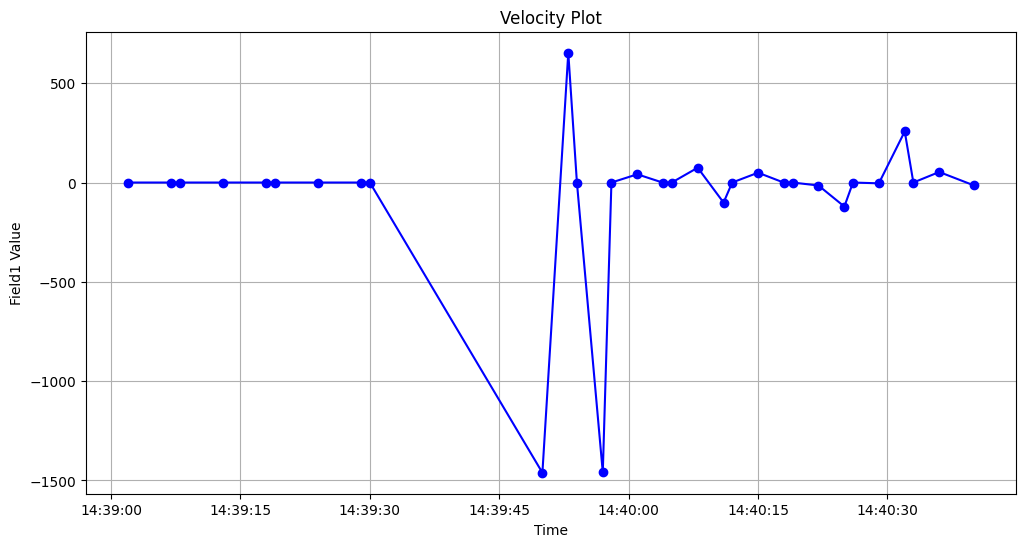

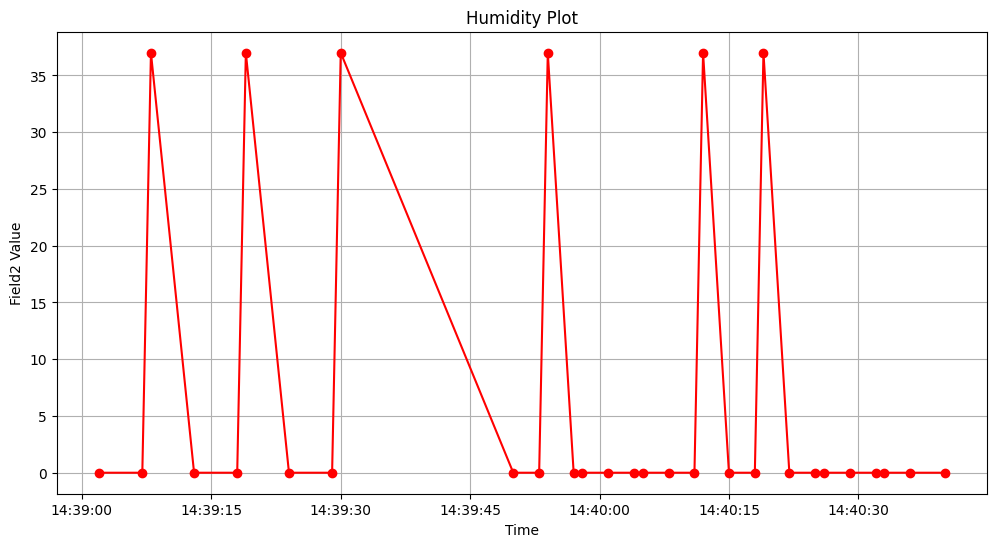

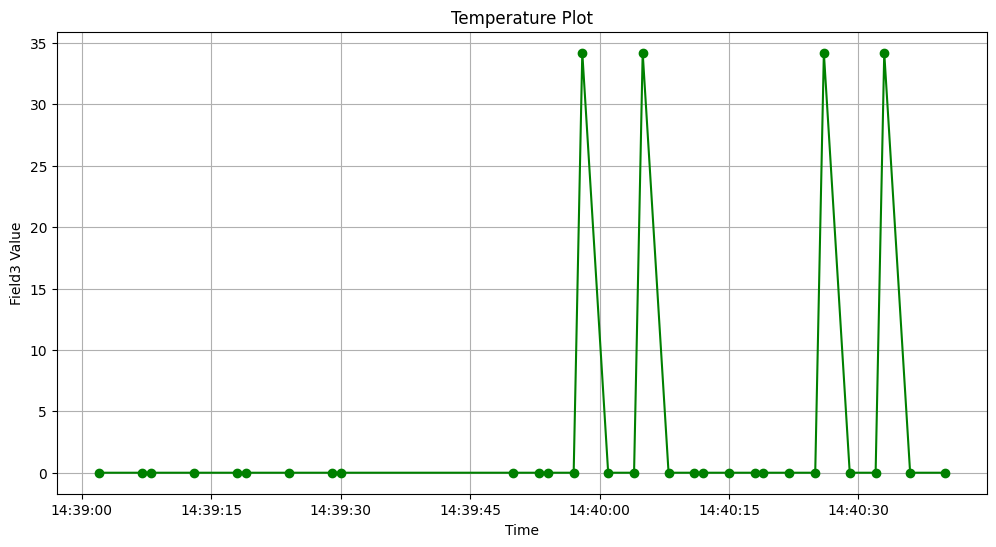

In [3]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['field1'] = pd.to_numeric(df['field1'], errors='coerce')

#field names
f1 = dic['channel']['field1']
f2 = dic['channel']['field2']
f3 = dic['channel']['field3']

# Plotting field1
plt.figure(figsize=(12, 6))
plt.plot(df['created_at'], df['field1'], marker='o', linestyle='-', color='b')
plt.title(f1+' Plot')
plt.xlabel('Time')
plt.ylabel('Field1 Value')
plt.grid(True)
plt.show()

# Plotting field2
plt.figure(figsize=(12, 6))
plt.plot(df['created_at'], df['field2'], marker='o', linestyle='-', color='r')
plt.title(f2+' Plot')
plt.xlabel('Time')
plt.ylabel('Field2 Value')
plt.grid(True)
plt.show()

# Plotting field3
plt.figure(figsize=(12, 6))
plt.plot(df['created_at'], df['field3'], marker='o', linestyle='-', color='g')
plt.title(f3+' Plot')
plt.xlabel('Time')
plt.ylabel('Field3 Value')
plt.grid(True)
plt.show()

# use to save image, replace plt.show() with this:
# plt.savefig('field1_plot.png')  # Save the plot as an image
# plt.close()  # Close the plot to clear the figure

# PUTTING IT ALL TOGETHER IN ONE MONSTER FUNCTION

In [12]:
import thingspeak
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import requests

def fetch_plots(channel_number, key, directory):
    # form = requests.get("https://api.thingspeak.com/channels/2470056/feeds.json?api_key=6WA7QY0CC9HDX9UO&results=2")

    channel_number = channel_number
    secret_key = key
    ch = thingspeak.Channel(channel_number,api_key=secret_key)
    res=ch.get({'results': 8000})
    dic=json.loads(res)
    df = pd.DataFrame(dic['feeds'])
    
    df['field1'] = df['field1'].fillna(0.0)
    df['field2'] = df['field2'].fillna(0.0)
    df['field3'] = df['field3'].fillna(0.0)
    
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['field1'] = pd.to_numeric(df['field1'], errors='coerce')

    #field names
    f1 = dic['channel']['field1']
    f2 = dic['channel']['field2']
    f3 = dic['channel']['field3']

    # Plotting field1
    plt.figure(figsize=(12, 6))
    plt.plot(df['created_at'], df['field1'], marker='o', linestyle='-', color='b')
    plt.title(f1+' Plot')
    plt.xlabel('Time')
    plt.ylabel('Field1 Value')
    plt.grid(True)
    plt.savefig(directory+'field1_plot.png')  # Save the plot as an image
    plt.close()  # Close the plot to clear the figure

    # Plotting field2
    plt.figure(figsize=(12, 6))
    plt.plot(df['created_at'], df['field2'], marker='o', linestyle='-', color='r')
    plt.title(f2+' Plot')
    plt.xlabel('Time')
    plt.ylabel('Field2 Value')
    plt.grid(True)
    plt.savefig(directory+'field2_plot.png')  # Save the plot as an image
    plt.close()  # Close the plot to clear the figure

    # Plotting field3
    plt.figure(figsize=(12, 6))
    plt.plot(df['created_at'], df['field3'], marker='o', linestyle='-', color='g')
    plt.title(f3+' Plot')
    plt.xlabel('Time')
    plt.ylabel('Field3 Value')
    plt.grid(True)
    plt.savefig(directory+'field3_plot.png')  # Save the plot as an image
    plt.close()  # Close the plot to clear the figure



# TEST

In [13]:
channel_number = 2470056
secret_key = '6WA7QY0CC9HDX9UO'
directory=''
fetch_plots(channel_number, secret_key,directory)